In [93]:
import sys
sys.path.insert(0, '../src')

from megs.model.mPCA import mPCA
from megs.data import image, DataLoader, Galaxy

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import numpy as np
import pickle
from tqdm import trange
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
import os


In [2]:
# Load model from pickle
with open("2dmodel60.pkl", 'rb') as f:
    mm = pickle.load(f)

In [3]:
scores = mm.get_scores()
eigengalaxies = mm.get_eigengalaxies()
means = mm.get_means()
images = mm.get_images()
rec = mm.inverse_transformed_datamatrix.reshape(-1,3, 64, 64)

In [9]:
bar_index = 30
spiral_index = 10

In [10]:
# Fine k nearest neighbours



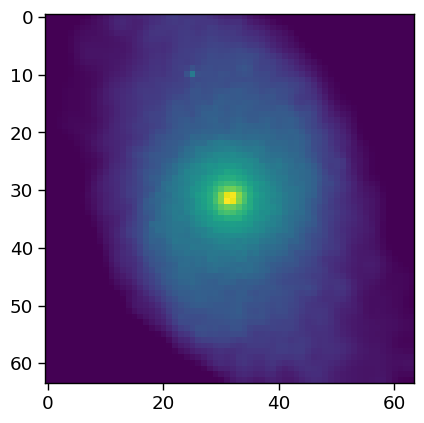

In [11]:
plt.imshow(images[spiral_index][2])

In [19]:


cmap = {"Metallicity": "magma", "Stellar Age": "gist_heat", "Masses": "cividis"}

fields = ["Metallicity", "Stellar Age", "Masses"]

savepath = None

labelsize=20


In [22]:
neighbours.shape

(5, 3, 64, 64)

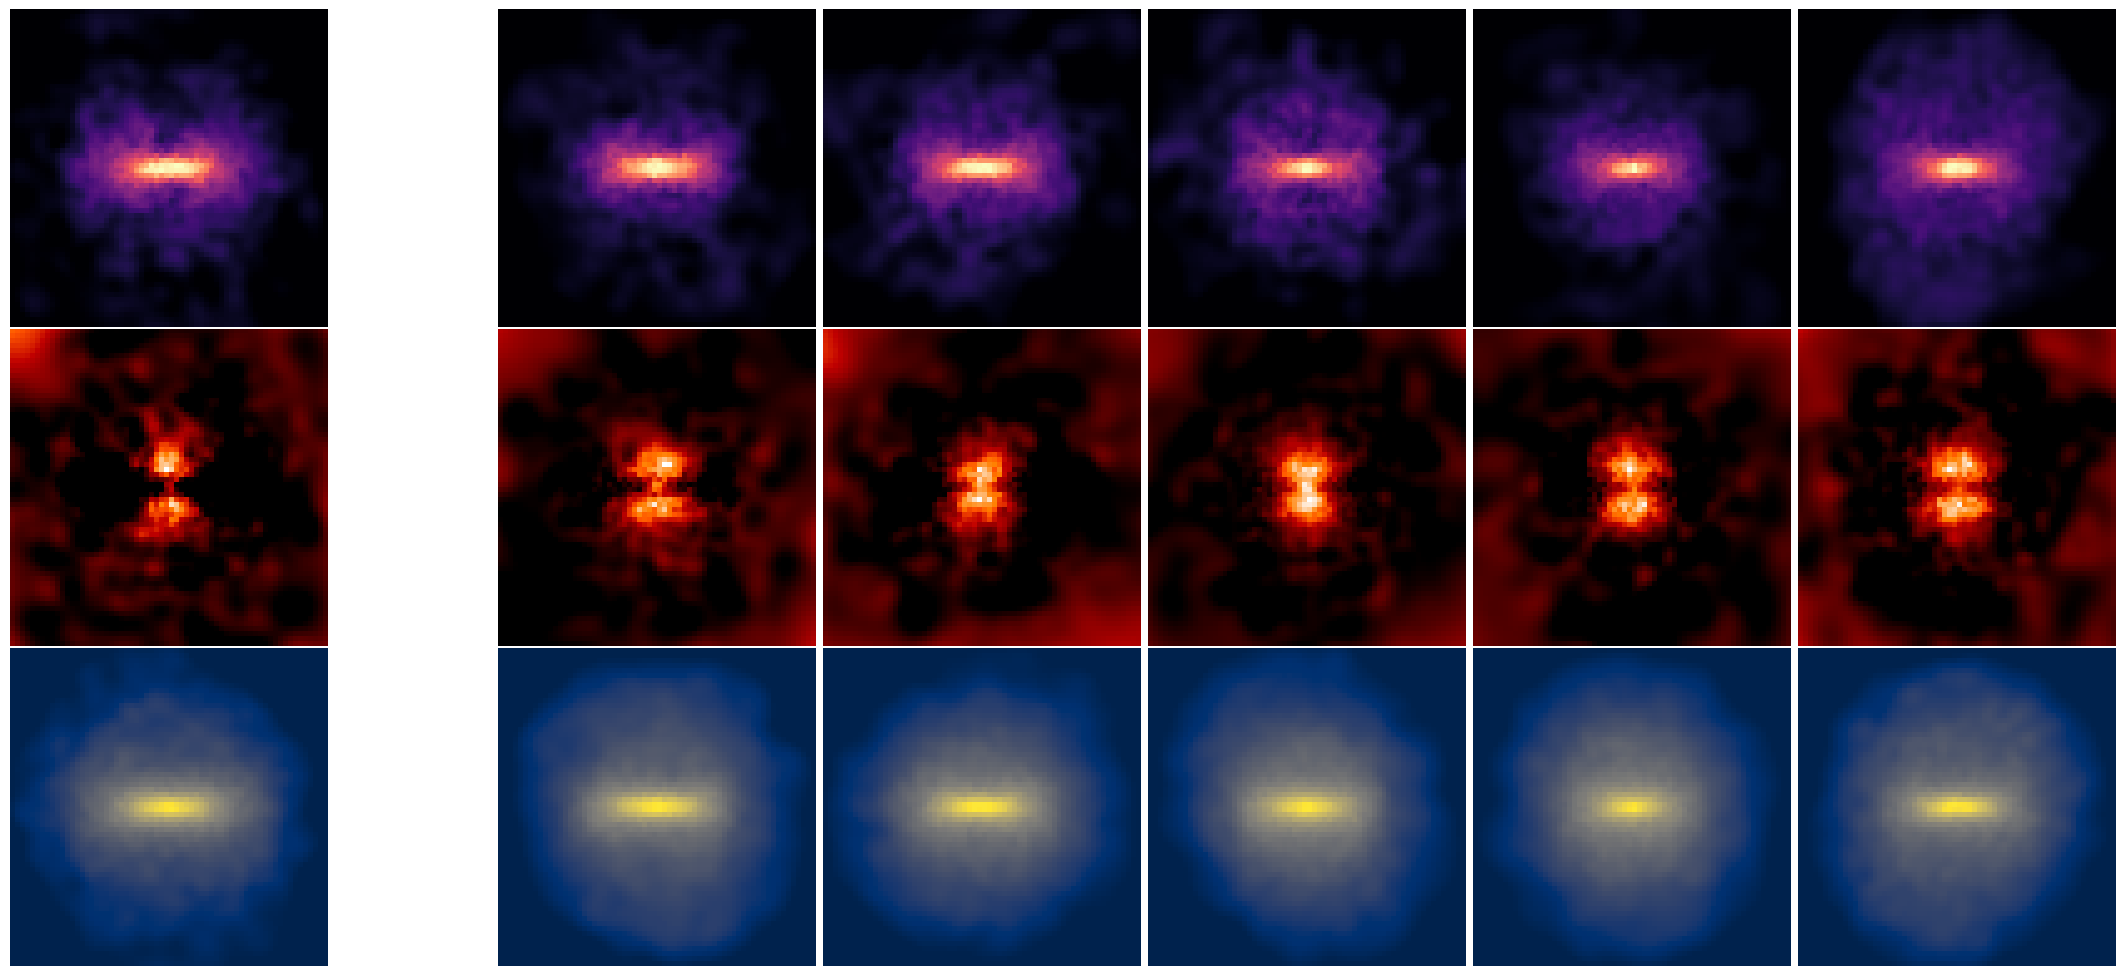

In [96]:

figsize = (40*7/13, 10)


set_title = False



gal_index = 30

k = 5 # number of nearest neighbours
gal_scores = scores[gal_index]
distances = np.linalg.norm(gal_scores - scores, axis=1)

# Set the distance of the gallery image to a large value to exclude it from the nearest neighbors
distances[gal_index] = float('inf')

neighbours_index = np.argsort(distances)[:k]
neighbours = images[neighbours_index]

og = images[gal_index] # original galaxy

fig = plt.figure(figsize=figsize)  # Define the figure first
widths = [1, 0.5,1, 1, 1, 1, 1]  # Adjust width ratios to accommodate the colorbar
gs = GridSpec(3, 7, figure=fig, width_ratios=widths)  # Pass the figure to the GridSpec

for i in range(3):
    ax1 = fig.add_subplot(gs[i, 0])  # First two columns for original images
    ax1.imshow(og[i], cmap=cmap[fields[i]])
    ax1.axis("off")
    if i == 0 and set_title: ax1.set_title(f"Sample", fontsize=labelsize)

cmap_dict = {0: "magma", 1: "gist_heat", 2: "cividis"}

#add emtpy axis
ax3 = fig.add_subplot(gs[:, 1])
ax3.axis("off")

for i in range(3):
    for j in range(k):
        ax = fig.add_subplot(gs[i, j+2])  # Allocate rest columns for eigengalaxies
        ax.imshow(neighbours[j][i], cmap=cmap_dict[i])
        ax.axis("off")
        
        if j == 2 and i==0 and set_title: ax.set_title(f"Nearest Neighbours", fontsize=labelsize)
      

plt.tight_layout(w_pad=0.1, h_pad=0.1)


os.makedirs("plots/nearest_neighbour", exist_ok=True)
savepath = f"plots/nearest_neighbour/nearest_neighbours_{gal_index}.pdf"

if savepath is not None:
    plt.savefig(savepath, dpi=300, bbox_inches='tight')
